<a href="https://colab.research.google.com/github/aakarshhh/AI_ML/blob/main/ML_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.metrics import silhouette_score as sc , davies_bouldin_score as db
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
cluster = [2,3,4,5,6,7,8,9,10]
shc = np.zeros(shape= ( 56 , len(cluster) ))
dbs = np.zeros(shape= ( 56 , len(cluster) ))
for  i in range(1 , 57):
  df = pd.read_csv(f'/content/{i}.csv',header=None)
  df = np.array(df)[:,0:-1]
  for n in cluster :
    km = KMeans(n_clusters= n , random_state= 2 ).fit(df)
    shc[ i-1 ,  n-2] = sc( df , km.labels_ )
    dbs[ i-1 , n-2 ] = db( df , km.labels_ )
shc = pd.DataFrame(shc, columns = cluster, index = [*range(1 , 57)])
dbs = pd.DataFrame(dbs, columns = cluster, index = [*range(1 , 57)])

In [12]:
with pd.ExcelWriter('ML_A1_2018A8PS0524H.xlsx') as writer:  
    shc.to_excel(writer, sheet_name='Silhouette Coefficient')
    dbs.to_excel(writer, sheet_name='Davies–Bouldin index' )

0.8676572035835833 0.2730556616344951 2


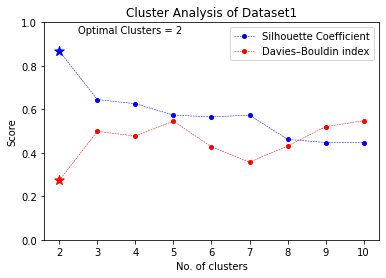

0.6640996559848932 0.40517355481114753 5


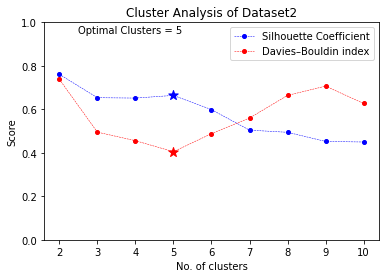

0.6601821306934016 0.5079431025792042 6


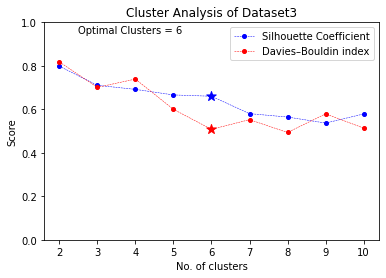

0.7335525079287374 0.6144638270356336 3


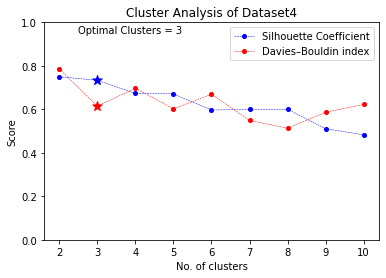

0.7871564506335829 0.7417656767869418 2


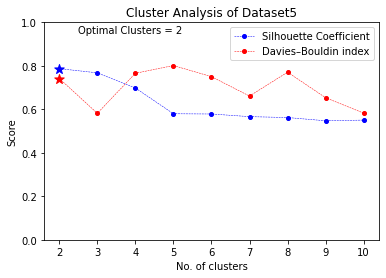

0.7442966873286766 0.512154806086528 4


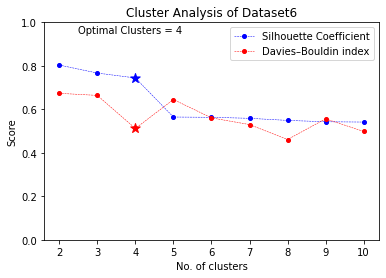

0.8901257430693091 0.23305297616909268 2


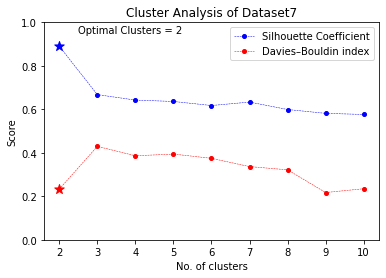

0.9022708005546629 0.4598419164100604 2


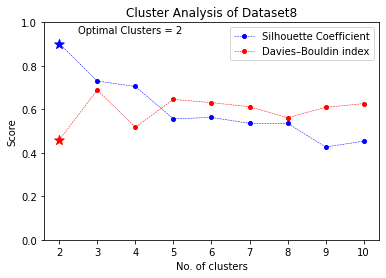

0.9538535211364401 0.1421665068451408 2


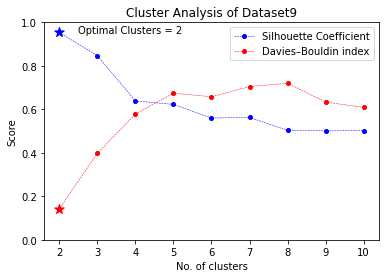

0.9755940523545877 0.2241369676727909 2


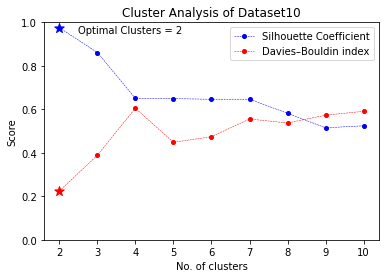

0.9784009268428379 0.357744933314244 2


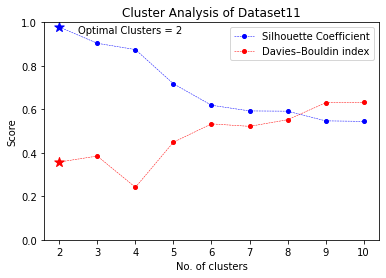

0.7550350859469228 0.5623335711649506 2


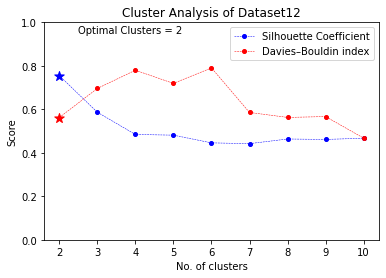

0.8990804845549171 0.04644706100392209 2


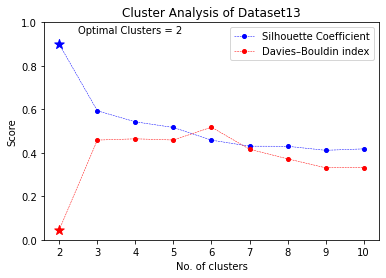

0.9082035814642517 0.3807931046628277 2


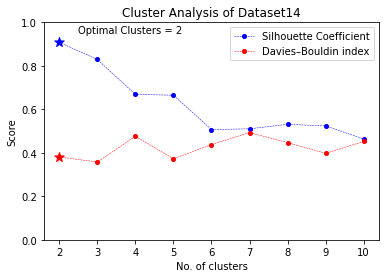

0.9795311286097995 0.01194206383928064 2


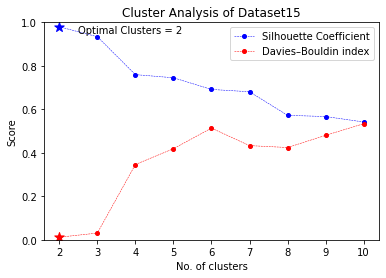

0.9609429818603168 0.02640608903370075 2


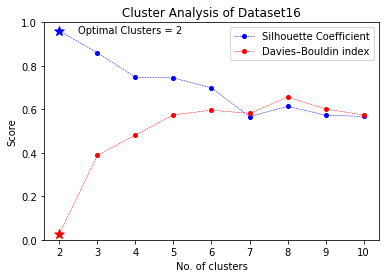

0.9375003739720009 0.25205732246720736 3


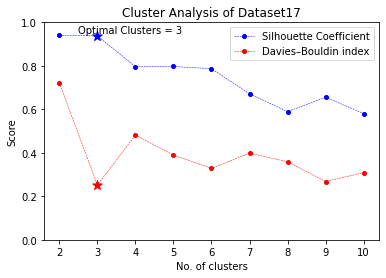

0.9338203572253102 0.21761869739001935 4


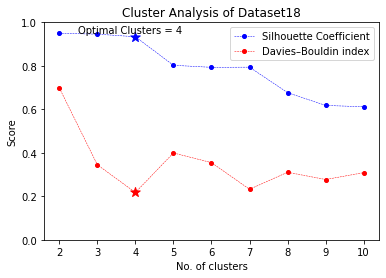

0.9433302839197477 0.28333584474228385 3


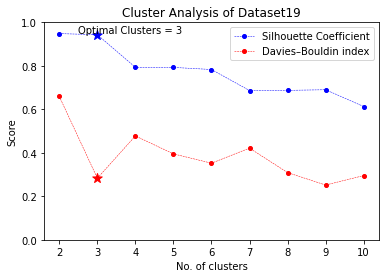

0.9487095988964712 0.29852632663760653 3


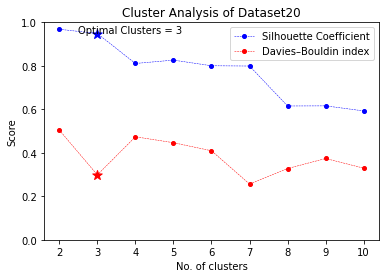

0.9774799908407845 0.3550313594368214 2


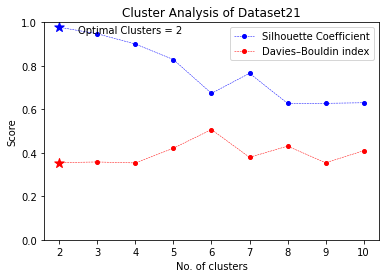

0.8822717983633167 0.29804340840985644 2


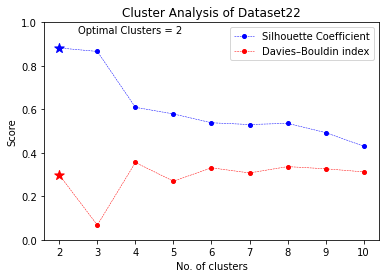

0.527258615275003 0.4662292130573112 7


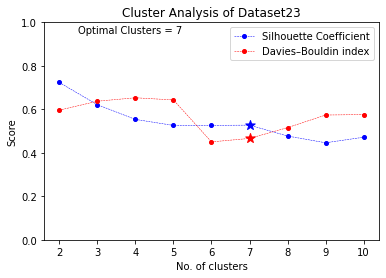

0.5684309141633425 0.5198419731229523 4


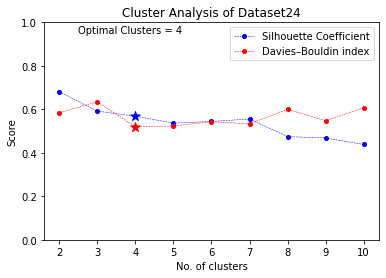

0.9553334917284482 0.02846953716115805 2


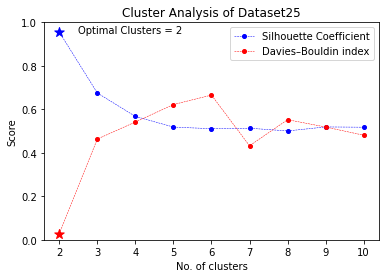

0.9008088392130524 0.2391750313691371 2


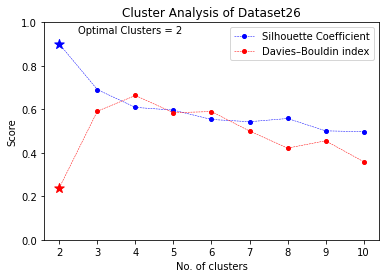

0.909062282852723 0.2856864885033687 2


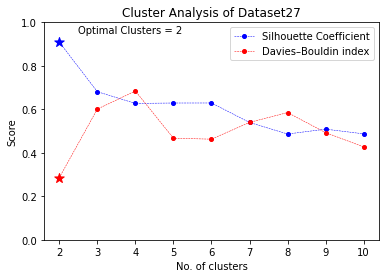

0.9571004200142383 0.027907692812190032 2


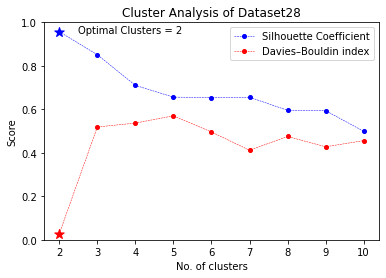

0.5458132856715788 0.41467316953904376 6


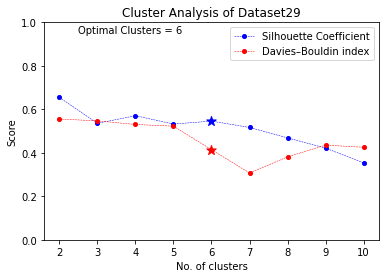

0.860922604044814 0.07740265282947159 2


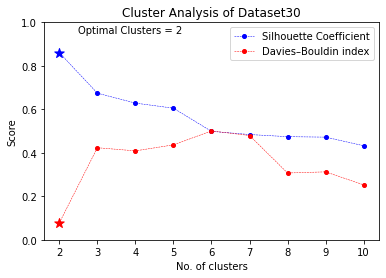

0.8799275970994268 0.6383178022732505 2


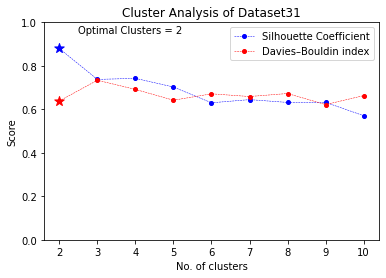

0.9921272164471497 0.4081616021171099 2


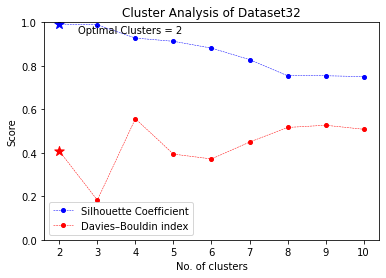

0.8846214926860152 0.48124922733109793 3


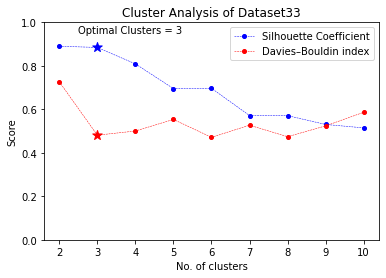

0.7972648583992924 0.5168611077575103 4


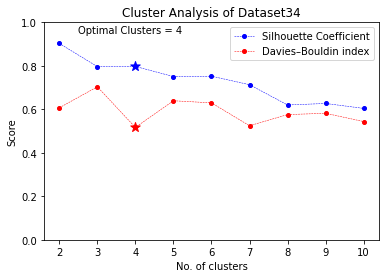

0.9851397041370897 0.1063939864505835 2


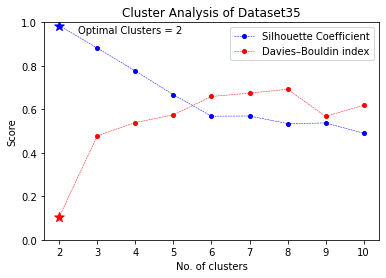

0.6381694734998415 0.7225554538197374 2


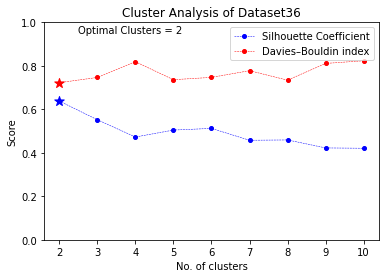

0.5608679618665486 0.4722313278484314 4


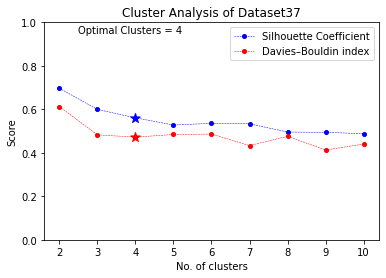

0.8783492448224165 0.2066099152189463 2


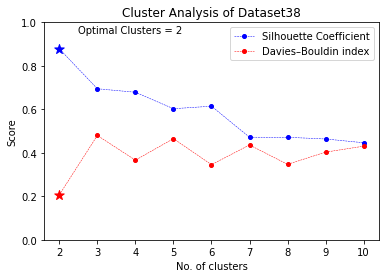

0.6940616015601417 0.47516391105494443 2


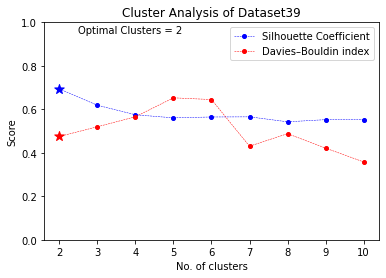

0.5031839306171165 0.25983558570320053 5


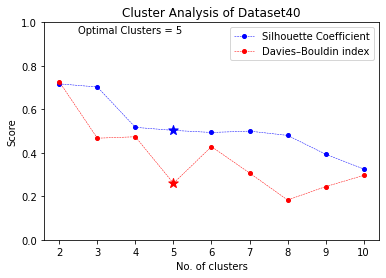

0.663553040241136 0.506920145291946 3


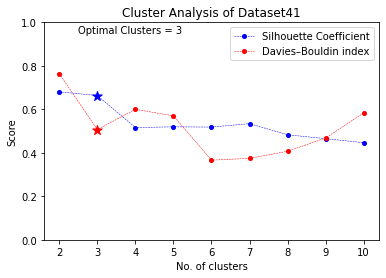

0.5292878546497731 0.5277561848870376 9


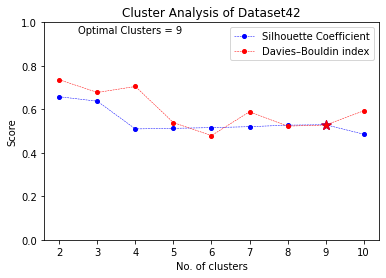

0.6750300824318786 0.5009764665141517 4


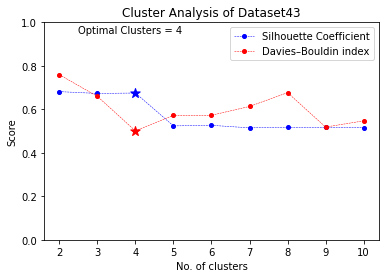

0.8716419288503379 0.22505521646119778 2


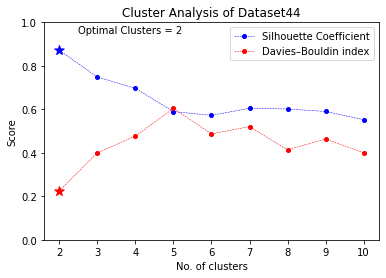

0.49553692279408024 0.42252627963871847 5


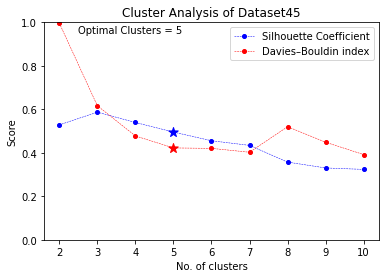

0.8909637648874849 0.06127355910121482 2


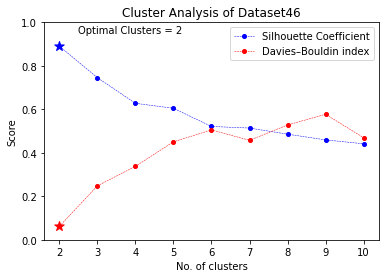

0.9773849909450099 0.01568285314067301 2


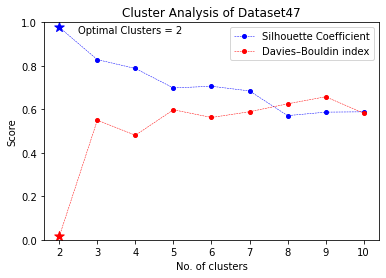

0.973491388764493 0.40076882089634264 2


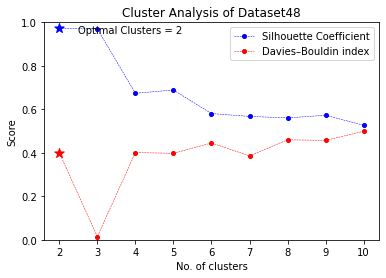

0.9734903878663439 0.4129096135617165 2


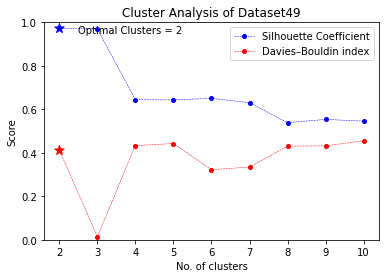

0.9282516571764001 0.030996729973592884 2


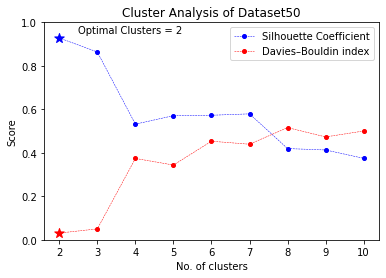

0.5971037093122225 0.3186162255134302 5


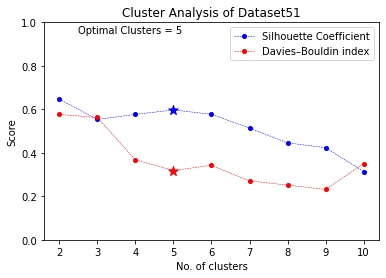

0.9237224144568948 0.20869846801488554 2


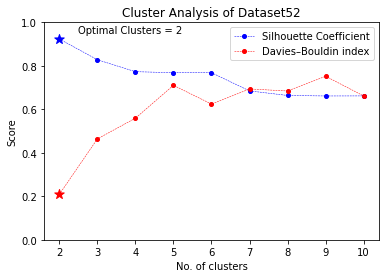

0.9268514996922186 0.2455367483904175 2


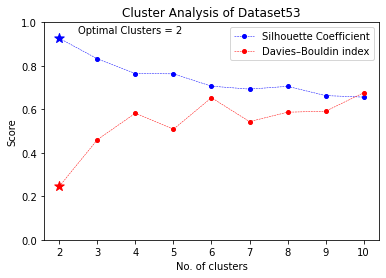

0.877808457929495 0.48361703906943493 2


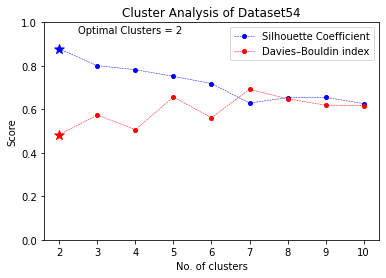

0.8911060142399198 0.5007228197538538 2


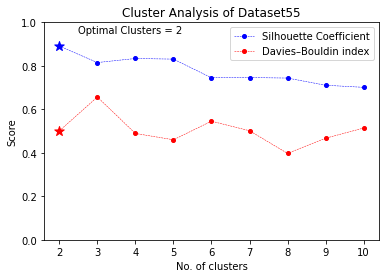

0.7075788368871427 0.3765786399889246 3


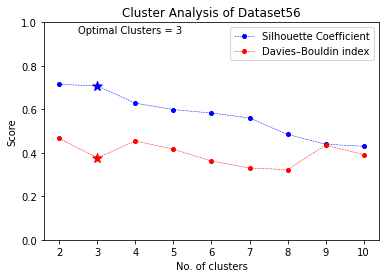

In [89]:
for  i in range(1 , 57):
  df = pd.read_csv(f'/content/{i}.csv',header=None)
  df = np.array(df)[:,0:-1]
  a = np.zeros(shape= (len(cluster) , 2))
  for n in cluster :
    km = KMeans(n_clusters= n , random_state= 2 ).fit(df)
    a[n-2 , 0] = sc( df , km.labels_ )
    a[n-2 , 1] = db( df , km.labels_ )
  
  res = [i for i, val in enumerate( a[:,0] == a[a[:,1] <= np.median(a[:,1])][:,0].max() ) if val]

  print(a[res[0]][0] , a[res[0]][1], res[0]+2 )

  plt.figure()
  plt.ylim(top= 1)
  plt.plot(cluster , a[:, 0] , color = 'blue' , marker='o', linestyle='dashed',  linewidth= .5, markersize= 4  , label = 'Silhouette Coefficient')
  plt.scatter( [res[0]+2] , [a[res[0]][0]] , c = 'blue' , marker = '*' ,s = 100  )
  plt.plot(cluster , a[:, 1] , color = 'red' , marker='o', linestyle='dashed',   linewidth= .5, markersize= 4 , label = 'Davies–Bouldin index')
  plt.scatter( [res[0]+2],[a[res[0]][1]] , c = 'red' , marker = '*' ,s = 100)
  plt.legend()
  plt.xlabel('No. of clusters')
  plt.ylabel('Score')
  plt.title(f'Cluster Analysis of Dataset{i}')
  plt.text(2.5,.95,f'Optimal Clusters = {res[0]+2}')
  plt.savefig(f'dataset{i}.png')
  plt.show()